In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [11]:
# Reading the file
column_names = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y']
df = pd.read_csv('tictac_single.txt', sep = ' ', names=column_names)

In [12]:
# Get X and y
y = df['y']
X = df.drop(columns = ['y'])
print(X.shape, y.shape)

(6551, 9) (6551,)


In [13]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 15)

print(X_train.shape, X_test.shape)

(5240, 9) (1311, 9)


In [14]:
# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 60, 80, 100, 125],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,10,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['auto','sqrt','log2']
}

In [16]:
# Initialize GridSearchCV
rf_grid = GridSearchCV(estimator = RandomForestClassifier(),
                       param_grid = param_grid_rf,
                       cv =5,
                       n_jobs = -1)

In [17]:
# Fit the model to the data
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [50, 60, 80, 100, 125]})

In [18]:
# Get the best parametetrs and the best estimator
print(rf_grid.best_params_)
best_rf = rf_grid.best_estimator_

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}


In [19]:
# Predict the labels of the test set samples
predicted_labels = best_rf.predict(X_test)

# Build the confusion matrix of our 3-class classification problem
cnf_matrix = metrics.confusion_matrix(y_test, predicted_labels)
print(cnf_matrix)

[[307   0   1   0  11   0   3   1   0]
 [ 10 115   7   3   9   2   2   1   1]
 [ 31   9 145   1   5   0   0   0   0]
 [  8   6  13  61  21   2   2   0   1]
 [ 26   0   7   0 179   0   1   0   0]
 [  9   2   1   3   2  48   4   0   0]
 [ 16   3   3   2   8   0  65   0   0]
 [  9   2   0   0   1   0   0  42   0]
 [ 22   4   0   1   6   3   0   0  64]]


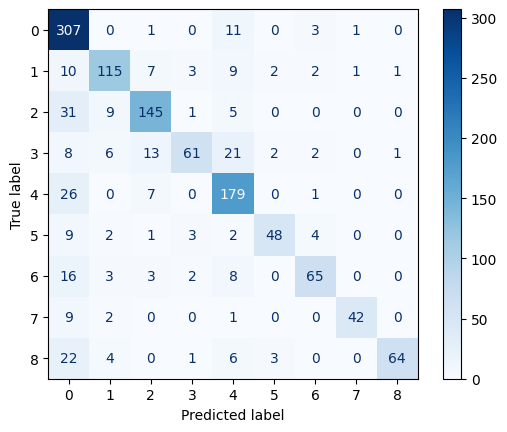

In [20]:
target_names = [0,1,2,3,4,5,6,7,8]

# Create the ConfusionMatrixDisplay object, ensuring 'cnf_matrix' is used
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=target_names)

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.show()

In [21]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) # using columns in confusion matrix
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix) # using rows in confusion matrix
TP = np.diag(cnf_matrix)                          # on the diagonal
TN = cnf_matrix.sum() - (FP + FN + TP)
print(FP, FN, TP, TN)

[131  26  32  10  63   7  12   2   2] [16 35 46 53 34 21 32 12 36] [307 115 145  61 179  48  65  42  64] [ 857 1135 1088 1187 1035 1235 1202 1255 1209]


In [22]:
# precision
precision = TP/(TP+FP)
print("Precision: ", precision)

# recall
recall = TP/(TP+FN)
print("Recall: ", recall)

# f1-score
F1_score = 2*(precision*recall)/(precision+recall)
print("F1_score: ", F1_score)

# Overall accuracy for each class
ACC = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy: ", ACC)

Precision:  [0.70091324 0.81560284 0.81920904 0.85915493 0.73966942 0.87272727
 0.84415584 0.95454545 0.96969697]
Recall:  [0.9504644  0.76666667 0.7591623  0.53508772 0.84037559 0.69565217
 0.67010309 0.77777778 0.64      ]
F1_score:  [0.80683311 0.79037801 0.78804348 0.65945946 0.78681319 0.77419355
 0.74712644 0.85714286 0.77108434]
Accuracy:  [0.88787185 0.95347063 0.94050343 0.95194508 0.92601068 0.97864226
 0.96643783 0.98932113 0.97101449]


In [23]:
import pickle

In [24]:
with open('model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)